In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_excel("C:\\UMAR DATA\\Data Sciences\\machine learning\\Projects\\Product demand forcasting\\Online Retail.xlsx")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Data Understanding

In [3]:
df.shape

(541909, 8)

In [4]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
df.duplicated().sum()

5268

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [8]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,541909,541909,540455,541909
unique,25900,4070,4223,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2313,2369,495478


# Data Handling

In [9]:
df_1=df.dropna(subset=['Description', 'CustomerID'])
df_1.shape

(406829, 8)

In [10]:
df_2=df_1.drop_duplicates()

In [11]:
print(f'Null values in a dataset\n{df_2.isnull().sum()}')
print(f'Duplicated values in a dataset:{df_2.duplicated().sum()}')

Null values in a dataset
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Duplicated values in a dataset:0


In [12]:
# filter InvoiceNo.cancellation 

In [13]:
df_2['InvoiceNo']=df_2['InvoiceNo'].astype(str)
df_3 = df_2[~df_2['InvoiceNo'].str.startswith('C')]
df_3.shape

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\1400308150.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['InvoiceNo']=df_2['InvoiceNo'].astype(str)


(392732, 8)

In [14]:
# filter unit price 

In [15]:
neg_or_zero_up=df_3[(df_3['UnitPrice']<0)|(df_3['UnitPrice']==0)]
print(f'Negative and Zero Unit price rows is :{len(neg_or_zero_up)}')
df_4=df_3[df_3['UnitPrice']>0]
df_4.shape

Negative and Zero Unit price rows is :40


(392692, 8)

In [16]:
# Some StockCode entries are not actual products so filter

In [17]:
df_4['StockCode'] = df_4['StockCode'].str.upper().str.strip()
no_product=df_4[df_4['StockCode'].isin(['Post','DOT','C2','M','BANK CHARGES'])]
print(f'Total Number of no product Rows is :{len(no_product)}')
df_5=df_4[~df_4['StockCode'].isin(['Post','DOT','C2','M','BANK CHARGES'])]
df_5.shape

Total Number of no product Rows is :440


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\2584691054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_4['StockCode'] = df_4['StockCode'].str.upper().str.strip()


(392252, 8)

# Feature Engineering

In [18]:
df_5['TotalPrice']=df_5['UnitPrice']*df_5['Quantity']
df_5.head()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\1690027819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['TotalPrice']=df_5['UnitPrice']*df_5['Quantity']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,NaN,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [19]:
# Exploratory Data Analysis

In [20]:
df_5['Month']=df_5['InvoiceDate'].dt.month
df_5['DayofWeek']=df_5['InvoiceDate'].dt.dayofweek

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\3623398741.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Month']=df_5['InvoiceDate'].dt.month
C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\3623398741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['DayofWeek']=df_5['InvoiceDate'].dt.dayofweek


In [21]:
df_6=df_5.groupby('Description').agg({
    'Quantity':'sum',
    'UnitPrice':'mean',
    'InvoiceNo':'nunique',
    'TotalPrice':'sum',
    'DayofWeek':lambda x: x.mode()[0],
    'Month': lambda x: x.mode()[0],
    'Country': lambda x: x.mode()[0]
}).reset_index()
df_7=df_6.sort_values(by='Quantity', ascending=False)
df_7.head()

,Description,Quantity,UnitPrice,InvoiceNo,TotalPrice,DayofWeek,Month,Country
2315,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,1,168469.60,4,12,United Kingdom
1989,MEDIUM CERAMIC TOP STORAGE JAR,77916,1.220303,195,81416.73,0,8,United Kingdom
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,0.292606,472,13558.41,2,11,United Kingdom
1759,JUMBO BAG RED RETROSPOT,46078,2.015969,1600,85040.54,3,11,United Kingdom
3694,WHITE HANGING HEART T-LIGHT HOLDER,36706,2.892768,1971,100392.10,3,12,United Kingdom


In [22]:
df_7['Demand'] = df_7['Quantity'].apply(lambda x: 'High' if x > 1500 else ('Medium' if (x > 800) and (x <= 1500) else 'Low'))
df_7.head()

,Description,Quantity,UnitPrice,InvoiceNo,TotalPrice,DayofWeek,Month,Country,Demand
2315,"PAPER CRAFT , LITTLE BIRDIE",80995,2.080000,1,168469.60,4,12,United Kingdom,High
1989,MEDIUM CERAMIC TOP STORAGE JAR,77916,1.220303,195,81416.73,0,8,United Kingdom,High
3782,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319,0.292606,472,13558.41,2,11,United Kingdom,High
1759,JUMBO BAG RED RETROSPOT,46078,2.015969,1600,85040.54,3,11,United Kingdom,High
3694,WHITE HANGING HEART T-LIGHT HOLDER,36706,2.892768,1971,100392.10,3,12,United Kingdom,High


# Exploratory Data Analysis

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\4226937022.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Set2')


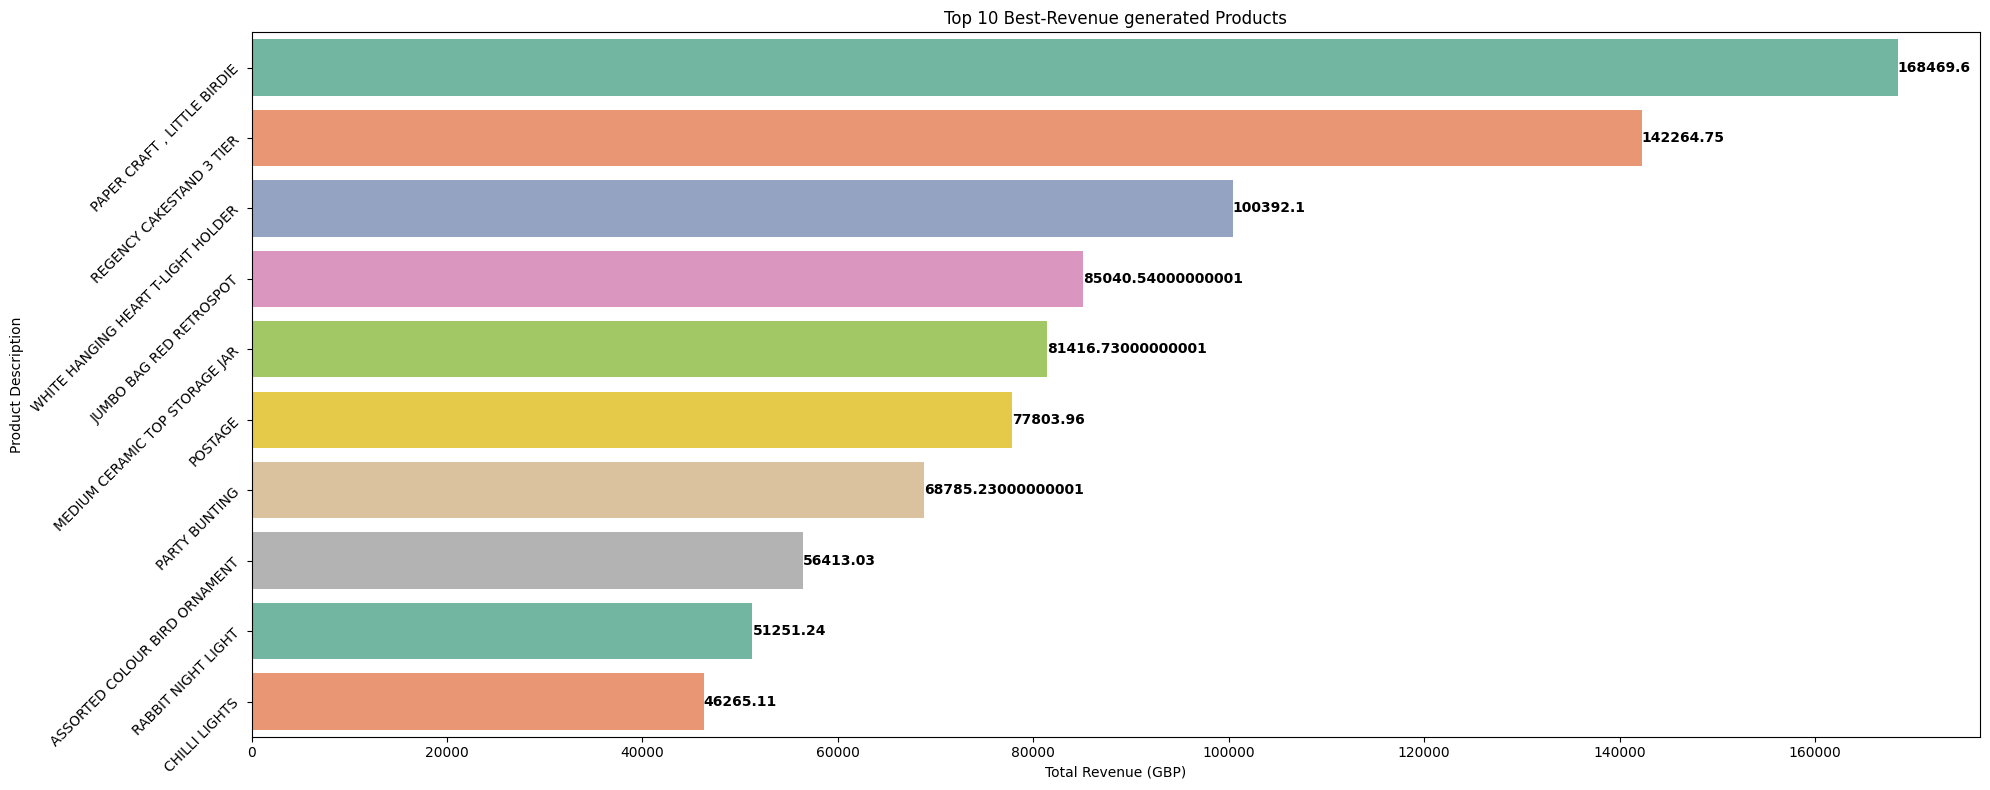

In [23]:
top_products = df_7.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(20,8))
sns.barplot(x=top_products.values, y=top_products.index, palette='Set2')
for i, value in enumerate(top_products.values):
    plt.text(value + 12, i, str(value), va='center', fontweight='bold') 
plt.title('Top 10 Best-Revenue generated Products')
plt.xlabel('Total Revenue (GBP)')
plt.ylabel('Product Description')
plt.yticks(rotation=45)
plt.tight_layout()


C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\2452992249.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')


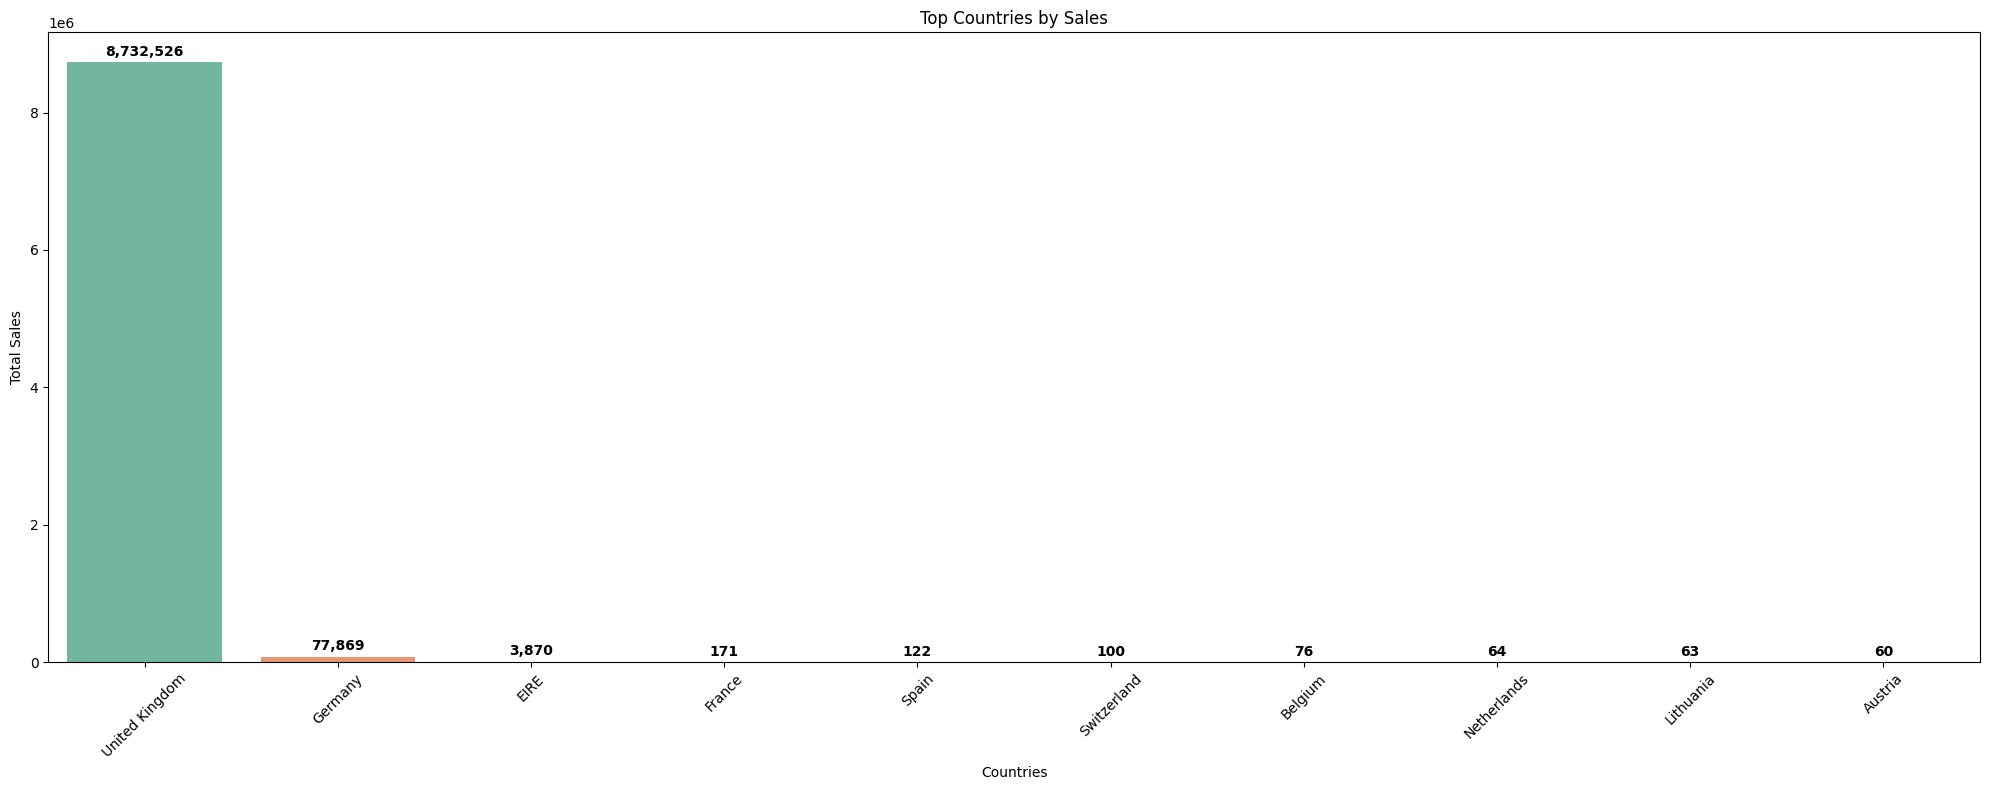

In [24]:
top_countries = df_7.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Create the bar plot
plt.figure(figsize=(20,8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set2')
for i, value in enumerate(top_countries.values):
    plt.text(i,value + 50000,f'{int(value):,}', ha='center', va='bottom', fontweight='bold') 
plt.title('Top Countries by Sales')
plt.xlabel('Countries')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()

C:\Users\Qadri Laptop\AppData\Local\Temp\ipykernel_10492\2989479170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5['Month_Year'] = df_5['InvoiceDate'].dt.to_period('M').astype(str)


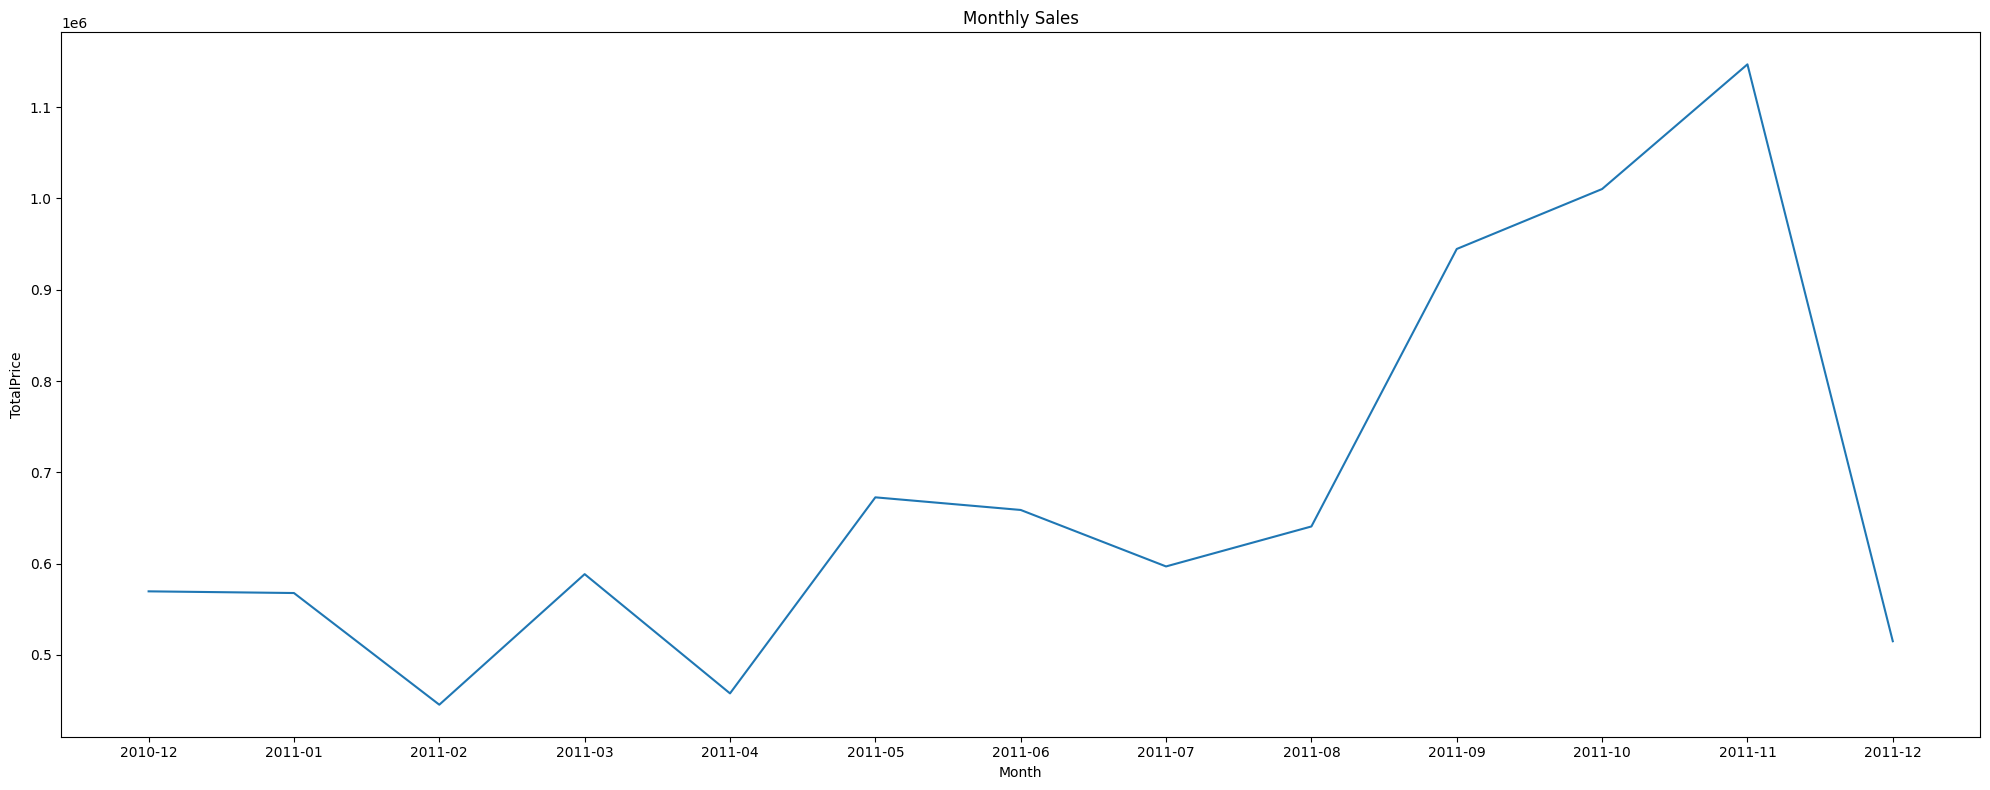

In [35]:
df_5['Month_Year'] = df_5['InvoiceDate'].dt.to_period('M').astype(str)

top_monthly_sales = df_5.groupby('Month_Year')['TotalPrice'].sum().reset_index()
# Create the bar plot
plt.figure(figsize=(20,8))
sns.lineplot(data=top_monthly_sales,x='Month_Year', y='TotalPrice',markers='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('TotalPrice')
plt.tight_layout()

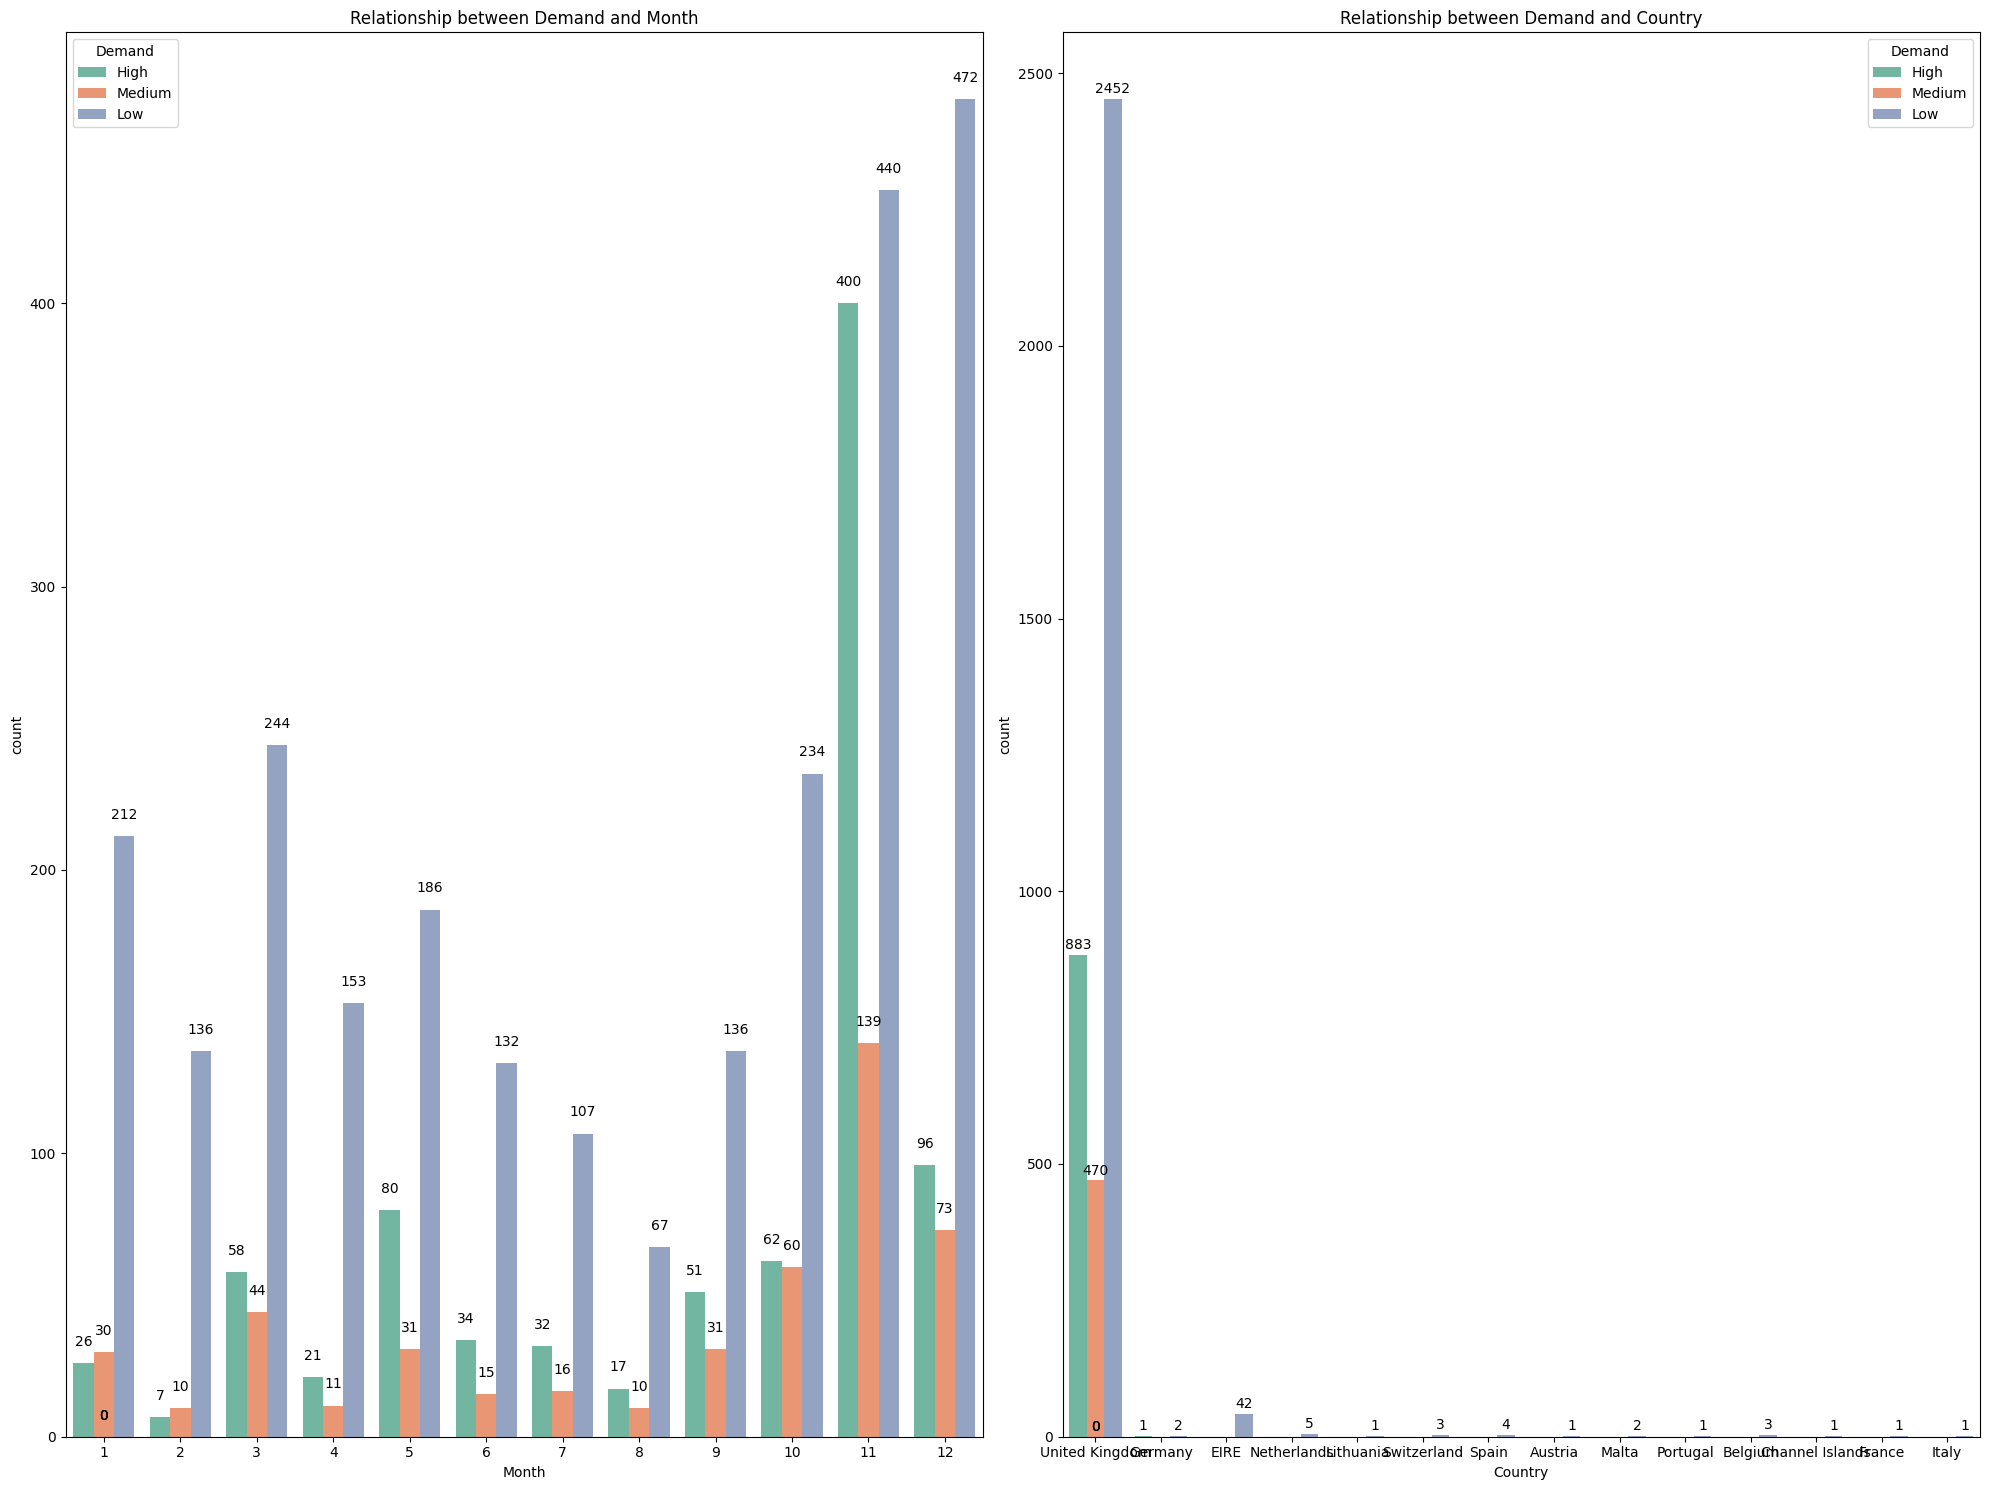

In [26]:
df_hist=df_7[['Month','Country']]
fig,axis=plt.subplots(1,2,figsize=(20,15))
axis=axis.flatten()
for i ,col in enumerate(df_hist):   
    ax=axis[i]
    plot=sns.countplot(data=df_7,hue='Demand',x=col,palette='Set2',ax=ax)
    ax.set_title(f'Relationship between Demand and {col}')
    for p in plot.patches:
        count=int(p.get_height())
        plot.annotate(str(count),(p.get_x()+p.get_width()/2,p.get_height()+5),ha='center',va='bottom')
plt.tight_layout()

# Data Preparation for Training

In [27]:
from sklearn.preprocessing import LabelEncoder
le_des=LabelEncoder()
le_cou=LabelEncoder()
le_dem=LabelEncoder()
df_7['Description']=le_des.fit_transform(df_7['Description'])
df_7['Country']=le_cou.fit_transform(df_7['Country'])
df_7['Demand']=le_dem.fit_transform(df_7['Demand'])

In [28]:
x=df_7.drop(['Demand','InvoiceNo','TotalPrice','DayofWeek'],axis='columns')
y=df_7.Demand

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

# Train the Model

In [30]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
from sklearn.metrics import classification_report
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       188
           1       1.00      1.00      1.00       481
           2       0.97      1.00      0.99       106

    accuracy                           1.00       775
   macro avg       0.99      1.00      0.99       775
weighted avg       1.00      1.00      1.00       775



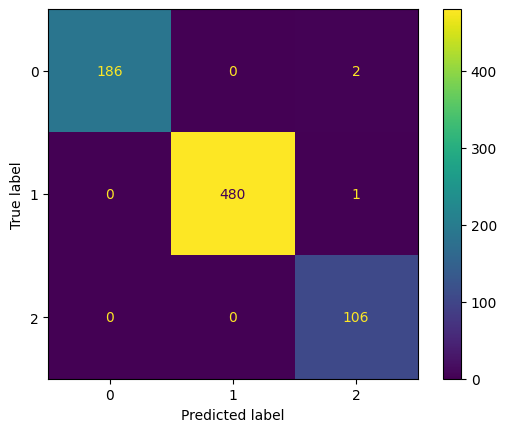

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [33]:
comparison_df = pd.DataFrame({
    'Product': x_test['Description'].values,
    'Actual_Demand': y_test,
    'Predicted_Demand': y_pred
})
comparison_df['Product'] =le_des.inverse_transform(comparison_df['Product'])
comparison_df['Actual_Demand'] =le_dem.inverse_transform(comparison_df['Actual_Demand'])
comparison_df['Predicted_Demand'] =le_dem.inverse_transform(comparison_df['Predicted_Demand'])

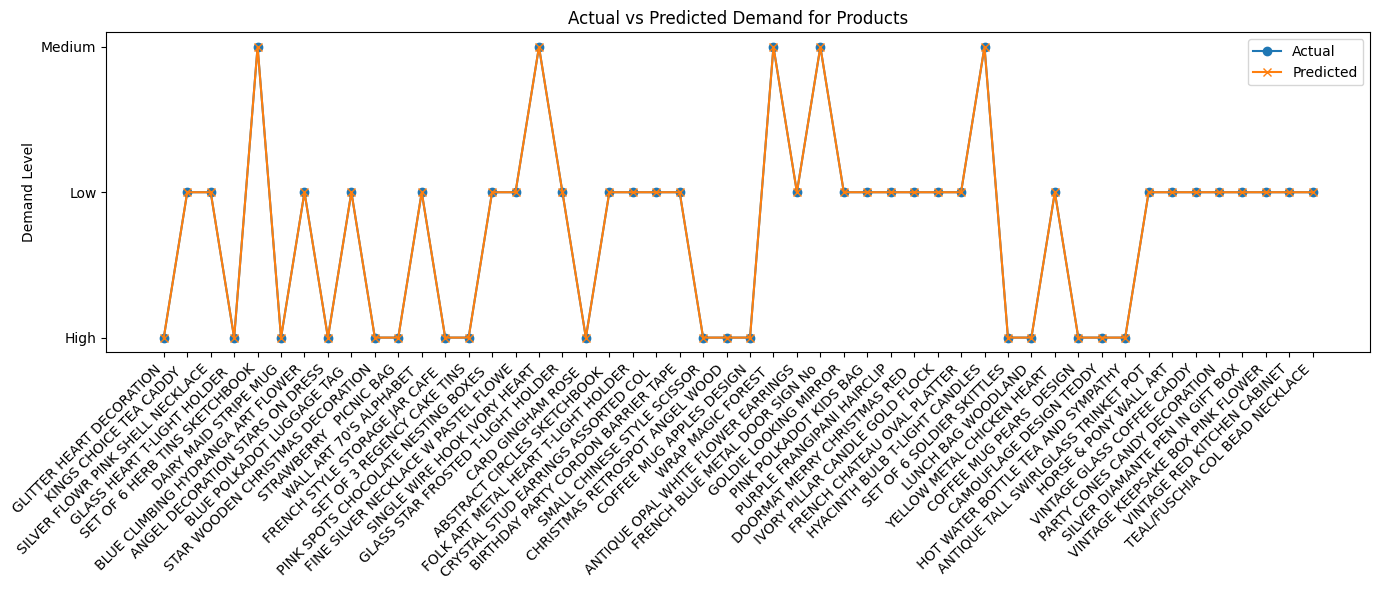

In [34]:
Graph = comparison_df.head(50)
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(Graph['Product'], Graph['Actual_Demand'], label='Actual', marker='o')
plt.plot(Graph['Product'], Graph['Predicted_Demand'], label='Predicted', marker='x')
plt.xticks(rotation=45,ha='right')
plt.ylabel('Demand Level')
plt.title('Actual vs Predicted Demand for Products')
plt.legend()
plt.tight_layout()


In [37]:
import pickle
with open(r'C:\UMAR DATA\Data Sciences\machine learning\Projects\Product demand forcasting\demand_forcasting.Pkl','wb') as file:
    pickle.dump('demand_forcasting.Pkl',file)